In [1]:
import sys
sys.path.append('../../../feature_selection')

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
# from skopt.space import Integer
# from skopt.space import Real
# from skopt.space import Categorical
# from skopt import BayesSearchCV
import pickle
import feature_selection_fnc
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras_tuner import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler

In [3]:
cleaned_df=pd.read_csv('../../../../training_data/variance_cleanup_features/variance_cleanup_selected_features.csv')
cleaned_df.set_index('url',inplace=True)

In [4]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [5]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_normalized = scaler.transform(X_train)
# X_test_normalized = scaler.transform(X_test)

In [26]:
# mi=SelectKBest(mutual_info_classif, k=50)
# mi.fit(X_train_normalized,y_train)
# X_train_normalized_selected=mi.transform(X_train_normalized)
# X_test_normalized_selected= mi.transform(X_test_normalized)

In [7]:
mi=SelectKBest(mutual_info_classif, k=50)
mi.fit(X_train,y_train)
X_train_selected=X_train.loc[:, mi.get_support()]
X_test_selected=X_test.loc[:, mi.get_support()]

In [31]:
pickle.dump(mi, open('neuronal_network_selectkbest_v1.pkl', 'wb'))

In [8]:
X_train_selected.to_csv('neuronal_network_selected_train_features_v1.csv',index=True)
X_test_selected.to_csv('neuronal_network_selected_test_features_v1.csv',index=True)

In [9]:
y_train.to_csv('neuronal_network_selected_train_label_v1.csv',index=True)
y_test.to_csv('neuronal_network_selected_test_label_v1.csv',index=True)

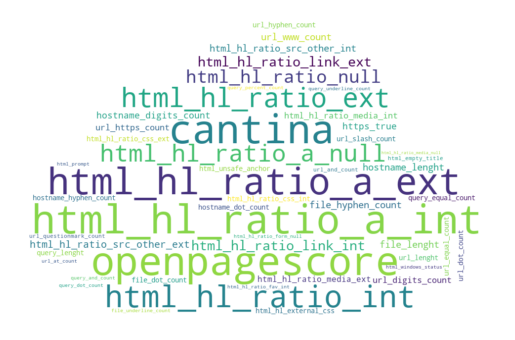

In [14]:
feature_selection_fnc.wordcloud_features(X_train,mi,50,"../../../../images/feature_selection/neuronal_network/neuronal_network_features_word_cloud_v1.png",'../../cloud.png')

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train_selected)
X_train_normalized_selected = scaler.transform(X_train_selected)
X_test_normalized_selected = scaler.transform(X_test_selected)

In [32]:
pickle.dump(scaler, open('neuronal_network_scaler_v1.pkl', 'wb'))

In [16]:
X_train_normalized_selected

array([[1.        , 0.00127796, 0.01494396, ..., 0.        , 0.4       ,
        1.        ],
       [1.        , 0.00127796, 0.01058531, ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 0.00638978, 0.01867995, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.00933998, ..., 0.        , 0.5       ,
        1.        ],
       [1.        , 0.        , 0.02179328, ..., 0.        , 0.2       ,
        1.        ],
       [1.        , 0.        , 0.05977584, ..., 0.        , 0.1       ,
        0.        ]])

In [17]:
model_before = keras.Sequential()
model_before.add(layers.Flatten(input_dim=50))
model_before.add(layers.Dense(16, activation='relu'))
model_before.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model_before.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history=model_before.fit(X_train_normalized_selected,y_train,epochs=100,validation_data=(X_test_normalized_selected,y_test))

Epoch 1/100
438/438 [==============================] - 1s 1ms/step - loss: 0.3366 - accuracy: 0.8886 - val_loss: 0.1936 - val_accuracy: 0.9320
Epoch 2/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1683 - accuracy: 0.9374 - val_loss: 0.1525 - val_accuracy: 0.9448
Epoch 3/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9456 - val_loss: 0.1353 - val_accuracy: 0.9517
Epoch 4/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9504 - val_loss: 0.1259 - val_accuracy: 0.9568
Epoch 5/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9541 - val_loss: 0.1199 - val_accuracy: 0.9578
Epoch 6/100
438/438 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9551 - val_loss: 0.1158 - val_accuracy: 0.9590
Epoch 7/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1189 - accuracy: 0.9566 - val_loss: 0.1130 - val_accuracy: 0.9598

In [20]:
y_pred = model_before.predict(X_test_normalized_selected)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

188/188 [==============================] - 0s 647us/step


Accuracy: 0.9716666666666667
Recall: 0.9728461280590011


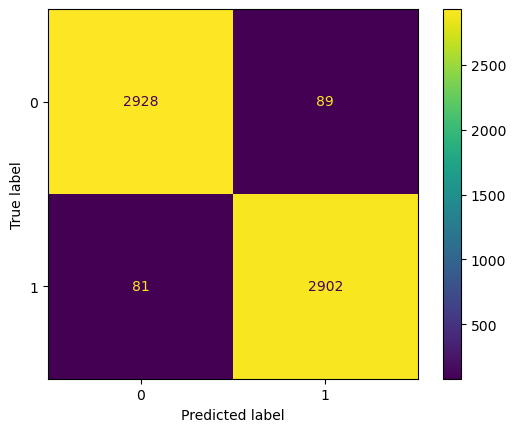

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../images/hyperparameter_tuning/neuronal_network/neuronal_network_confusion_matrix_before_tuning_v1',dpi=300, bbox_inches = "tight")

In [25]:
model_before.save('../../../saved_models/neuronal_network/neuronal_network_before_v1.keras')

In [26]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_dim=50))
    
    # Tune the number of units in the first dense layer
    # Choose an optimal value between 32-512
    hp_units1 = hp.Int('units1', min_value=16, max_value=512, step=16)
    model.add(layers.Dense(units=hp_units1, activation='relu'))
    hp_units2 = hp.Int('units2', min_value=16, max_value=512, step=16)
    model.add(layers.Dense(units=hp_units2, activation='relu'))
    
    # Tune the number of units in the second dense layer
    # Choose an optimal value between 32-512
    # hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    # model.add(layers.Dense(units=hp_units2, activation='relu'))
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [27]:
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=4,
    directory='logs',
    project_name='phishing_tuning_v1')

In [28]:
tuner.results_summary()

Results summary
Results in logs\phishing_tuning_v1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")


In [29]:
tuner.search(X_train_normalized_selected,y_train, epochs=100, validation_data=(X_test_normalized_selected, y_test))

Trial 20 Complete [00h 03m 43s]
val_accuracy: 0.9695416837930679

Best val_accuracy So Far: 0.9763333350419998
Total elapsed time: 01h 58m 28s


In [33]:
tuner.results_summary(1)

Results summary
Results in logs\phishing_tuning_v1
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 18 summary
Hyperparameters:
units1: 512
units2: 16
learning_rate: 0.0001
Score: 0.9763333350419998


In [34]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 512)               26112     
                                                                 
 dense_1 (Dense)             (None, 16)                8208      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 34337 (134.13 KB)
Trainable params: 34337 (134.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
history=model.fit(X_train_normalized_selected,y_train,epochs=100,validation_data=(X_test_normalized_selected,y_test))

Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9809 - val_loss: 0.0867 - val_accuracy: 0.9728
Epoch 2/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0566 - accuracy: 0.9817 - val_loss: 0.0810 - val_accuracy: 0.9752
Epoch 3/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0561 - accuracy: 0.9822 - val_loss: 0.0801 - val_accuracy: 0.9755
Epoch 4/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0557 - accuracy: 0.9815 - val_loss: 0.0866 - val_accuracy: 0.9722
Epoch 5/100
438/438 [==============================] - 1s 1ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0847 - val_accuracy: 0.9733
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.9821 - val_loss: 0.0840 - val_accuracy: 0.9747
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: 0.0541 - accuracy: 0.9820 - val_loss: 0.0812 - val_accuracy: 0.9742

In [36]:
y_pred = model.predict(X_test_normalized_selected)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

188/188 [==============================] - 0s 711us/step


Accuracy: 0.9723333333333334
Recall: 0.9772041568890378


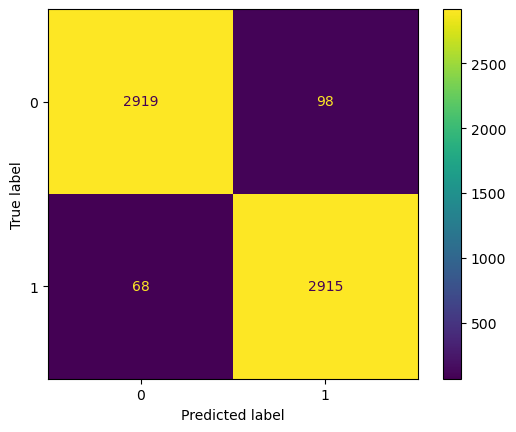

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../images/hyperparameter_tuning/neuronal_network/neuronal_network_confusion_matrix_after_tuning_v1',dpi=300, bbox_inches = "tight")

In [39]:
model.save('../../../saved_models/neuronal_network/neuronal_network_tuned_v1.keras')

In [40]:
X_train_selected_test=pd.read_csv('neuronal_network_selected_train_features_v1.csv')

In [43]:
X_test_selected_test=pd.read_csv('neuronal_network_selected_test_features_v1.csv')

In [44]:
X_train_selected_test.set_index('url',inplace=True)
X_test_selected_test.set_index('url',inplace=True)

In [45]:
scaler = MinMaxScaler()
scaler.fit(X_train_selected_test)
X_train_normalized_selected_test = scaler.transform(X_train_selected_test)
X_test_normalized_selected_test = scaler.transform(X_test_selected_test)

In [47]:
model_test = keras.models.load_model('../../../saved_models/neuronal_network/neuronal_network_tuned_v1.keras')

In [48]:
model_test

In [49]:
y_pred_test = model_test.predict(X_test_normalized_selected_test)
y_pred_test = tf.squeeze(y_pred_test)
y_pred_test = np.array([1 if x >= 0.5 else 0 for x in y_pred_test])

188/188 [==============================] - 0s 663us/step


Accuracy: 0.9723333333333334
Recall: 0.9772041568890378


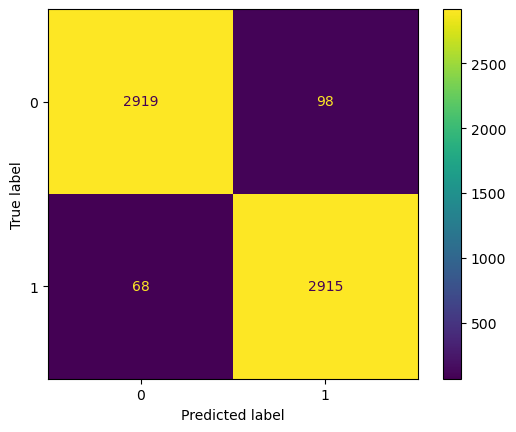

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
conf_mat = confusion_matrix(y_test,y_pred_test)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()